# Image classification for identification of eye diseases using eye disease retinal image dataset.
##### Author
    Md. Mintu Hossain
    ID: 2315034650

#### Find the Model Performance with Preprocessed

This research focusses on classifying retinal eye disease images using different deep learning architectures.The objective is to develop a model that can accurately identify various retinal diseases, aiding in early diagnosis treatment.

## Install and Import the required libraries and packages

In [1]:
!pip install tensorflow
!pip install opencv-python
!pip3 install imagehash
!pip install matplotlib seaborn

In [2]:
import os
import time
import shutil
import pathlib
import itertools
import imagehash
from PIL import Image
# import data handling tools
import cv2
import random
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import regularizers
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from imblearn.over_sampling import RandomOverSampler
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


## Import Data

    Loading the Retinal Dataset

In [3]:

dataset_path = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/Eye_Dataset'

image_data = []  # To store images
labels = []      # To store corresponding labels

for class_dir in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, class_dir)):
        class_label = class_dir
        class_path = os.path.join(dataset_path, class_dir)
        for image_filename in os.listdir(class_path):
            if image_filename.endswith(".jpg"):       # or image_filename.endswith(".jpeg") or image_filename.endswith(".png"):
                image_path = os.path.join(class_path, image_filename)
                image = Image.open(image_path)
                image_data.append(image)
                labels.append(class_label)

## Dataset Statistics
    Visualize the dataset statistics

Number of Classes: 4
Category: cataract, Data Count: 2076
Category: diabetic_retinopathy, Data Count: 2196
Category: glaucoma, Data Count: 2014
Category: normal, Data Count: 2148


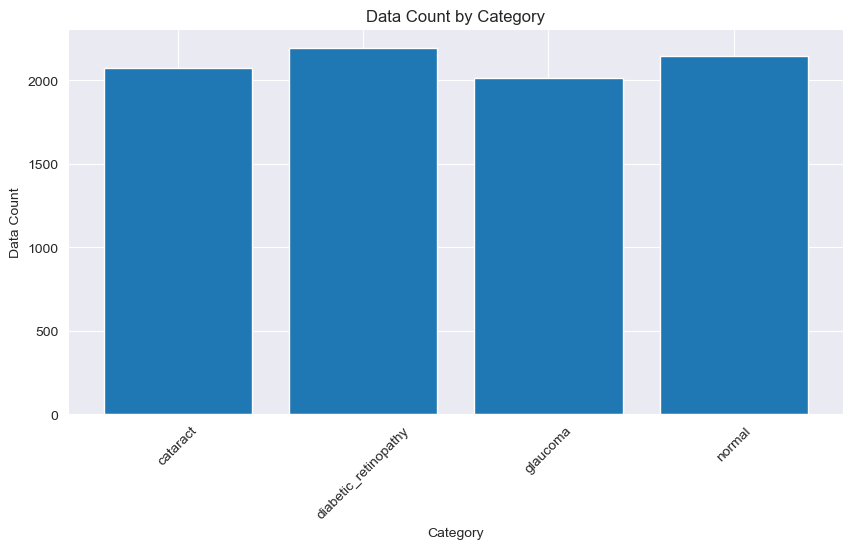

In [4]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your image dataset
dataset_directory = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/Eye_Dataset'

# Initialize variables to store dataset statistics
categories = []  # List to store category names
data_counts = []  # List to store data counts

# Loop through the subdirectories (categories) in your dataset
for category in os.listdir(dataset_directory):
    category_dir = os.path.join(dataset_directory, category)

    if os.path.isdir(category_dir):
        categories.append(category)
        data_count = len(os.listdir(category_dir))
        data_counts.append(data_count)

# Calculate the total number of classes
num_classes = len(categories)

# Display dataset statistics
print("Number of Classes:", num_classes)
for i, category in enumerate(categories):
    print(f"Category: {category}, Data Count: {data_counts[i]}")

# Plot the dataset
plt.figure(figsize=(10, 5))
plt.bar(categories, data_counts)
plt.title('Data Count by Category')
plt.xlabel('Category')
plt.ylabel('Data Count')
plt.xticks(rotation=45)
plt.show()


## Data Visualization
    Visualize the Sample of data from every category

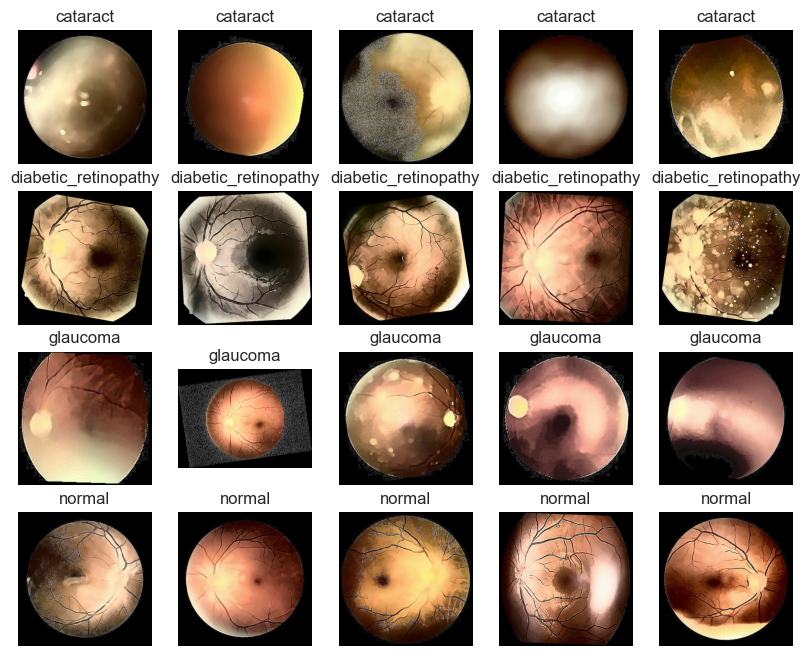

In [5]:

# Path to the directory containing your dataset
##dd = 'path_to_dataset_directory'

# List of subdirectories (representing categories or classes)
categories = sorted(os.listdir(dataset_path))

# Number of sample images to display per category
num_samples = 5

# Create a figure with subplots for each category
fig, axs = plt.subplots(len(categories), num_samples, figsize=(10, 8))

for i, category in enumerate(categories):
    category_dir = os.path.join(dataset_path, category)
    image_files = os.listdir(category_dir)
    
    # Randomly select a few sample images
    sample_images = random.sample(image_files, num_samples)
    
    for j, image_file in enumerate(sample_images):
        image_path = os.path.join(category_dir, image_file)
        img = cv2.imread(image_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB format
        
        axs[i, j].imshow(img)
        axs[i, j].set_title(category)
        axs[i, j].axis('off')

plt.show()

## Data Splitting
    Dataset splitting for training, validating and testing

In [6]:
import random

# Set your dataset path
dataset_path = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/Eye_Dataset'

# Define paths for your training, validation, and test sets
train_path = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/training_data'
valid_path = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/validation_data'
test_path = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/testing_data'

# Define the ratio for splitting (e.g., 70% train, 15% validation, 15% test)
train_ratio = 0.7
valid_ratio = 0.15
test_ratio = 0.15

# Create directories for the training, validation, and test sets
os.makedirs(train_path, exist_ok=True)
os.makedirs(valid_path, exist_ok=True)
os.makedirs(test_path, exist_ok=True)

# Iterate through the classes in your dataset
for class_dir in os.listdir(dataset_path):
    if os.path.isdir(os.path.join(dataset_path, class_dir)):
        class_images = os.listdir(os.path.join(dataset_path, class_dir))
        random.shuffle(class_images)  # Shuffle the images in each class

        # Split the images into training, validation, and test sets
        num_images = len(class_images)
        num_train = int(train_ratio * num_images)
        num_valid = int(valid_ratio * num_images)

        train_images = class_images[:num_train]
        valid_images = class_images[num_train:num_train + num_valid]
        test_images = class_images[num_train + num_valid:]

        # Copy images to the corresponding directories
        for image in train_images:
            src = os.path.join(dataset_path, class_dir, image)
            dest = os.path.join(train_path, class_dir, image)
            os.makedirs(os.path.dirname(dest), exist_ok=True)
            shutil.copy(src, dest)

        for image in valid_images:
            src = os.path.join(dataset_path, class_dir, image)
            dest = os.path.join(valid_path, class_dir, image)
            os.makedirs(os.path.dirname(dest), exist_ok=True)
            shutil.copy(src, dest)

        for image in test_images:
            src = os.path.join(dataset_path, class_dir, image)
            dest = os.path.join(test_path, class_dir, image)
            os.makedirs(os.path.dirname(dest), exist_ok=True)
            shutil.copy(src, dest)

## Data Partitioning (Training & Testing)

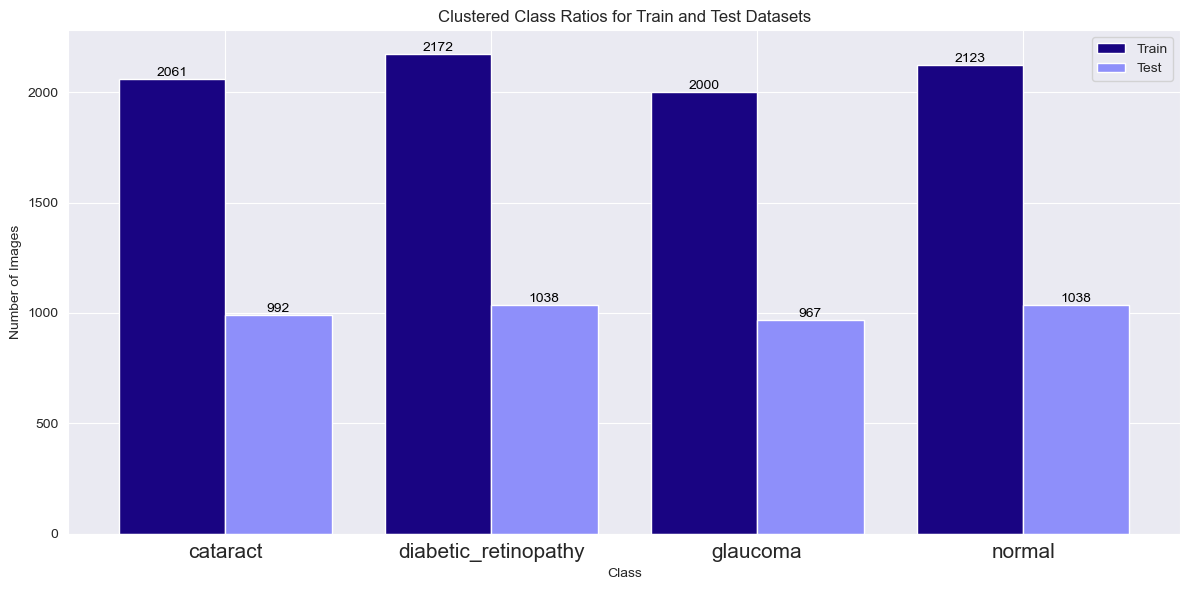

In [7]:
# Define the paths to your train and test datasets

train_dir = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/training_data'
valid_dir = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/validation_data'
test_dir = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/testing_data'

# Initialize dictionaries to store class counts for train and test
train_class_counts = {}
test_class_counts = {}

# Count the number of images for each class in the train dataset
for class_dir in os.scandir(train_dir):
    if class_dir.is_dir():
        class_name = class_dir.name
        image_count = len([entry.name for entry in os.scandir(class_dir) if entry.is_file()])
        train_class_counts[class_name] = image_count

# Count the number of images for each class in the test dataset
for class_dir in os.scandir(test_dir):
    if class_dir.is_dir():
        class_name = class_dir.name
        image_count = len([entry.name for entry in os.scandir(class_dir) if entry.is_file()])
        test_class_counts[class_name] = image_count

# Extract class names and counts for plotting
train_class_names = list(train_class_counts.keys())
train_image_counts = list(train_class_counts.values())

test_class_names = list(test_class_counts.keys())
test_image_counts = list(test_class_counts.values())

# Combine the train and test data for plotting
all_class_names = train_class_names
train_image_counts = np.array(train_image_counts)
test_image_counts = np.array(test_image_counts)

x = np.arange(len(all_class_names))
width = 0.40

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, train_image_counts, width, label='Train', color='#190482')
plt.bar(x + width/2, test_image_counts, width, label='Test', color='#8E8FFA')
plt.title('Clustered Class Ratios for Train and Test Datasets')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.legend()
plt.xticks(x, all_class_names, rotation=0, fontsize=15, ha="center")

# Add count labels on top of the bars
for i, count in enumerate(train_image_counts):
    plt.text(x[i] - width/2, count, str(count), ha='center', va='bottom', fontsize=10, color='black')
for i, count in enumerate(test_image_counts):
    plt.text(x[i] + width/2, count, str(count), ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

## VGG16 Model Train

    VGG16 is a convolutional neural network(CNN) architecture known for its deep layers and simplicity, consisting of 16 weight layers, including 13 convolutional layers and 3 fully connected layers. It was developed by the Visual Geometry Group at the University of Oxford and has been widely used for image classification and feature extraction tasks in computer vision.
    In this section, we tarin the VGG16 model.

In [4]:

train_data_dir = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/training_data'
valid_data_dir = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/validation_data'
test_data_dir = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/testing_data'

batch_size = 32
image_size = (224, 224) 
num_classes = 4  

train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,  # Normalize pixel values to [0, 1]
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_data_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 8356 images belonging to 4 classes.
Found 3994 images belonging to 4 classes.


In [5]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(224, 224, 3))

x = base_model.output
x = Flatten()(x)
x = Dense(1024, activation='relu')(x) # Fully connected and Rectifier Linear Unit activation function
x = Dropout(0.5)(x)                     # use dropout layer to reduce overfitting

predictions = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the layers of the pre-trained VGG model
for layer in base_model.layers:
    layer.trainable = False

In [6]:

model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [7]:
epochs = 15  # Set the number of training epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // batch_size,
    epochs=epochs
)

Epoch 1/15
261/261 [==============================] - 2382s 9s/step - loss: 0.8455 - accuracy: 0.6581 - val_loss: 0.5743 - val_accuracy: 0.7755
Epoch 2/15
261/261 [==============================] - 2342s 9s/step - loss: 0.6552 - accuracy: 0.7365 - val_loss: 0.5113 - val_accuracy: 0.8054
Epoch 3/15
261/261 [==============================] - 2343s 9s/step - loss: 0.5959 - accuracy: 0.7644 - val_loss: 0.4546 - val_accuracy: 0.8299
Epoch 4/15
261/261 [==============================] - 2358s 9s/step - loss: 0.5770 - accuracy: 0.7701 - val_loss: 0.4350 - val_accuracy: 0.8311
Epoch 5/15
261/261 [==============================] - 2348s 9s/step - loss: 0.5551 - accuracy: 0.7782 - val_loss: 0.4370 - val_accuracy: 0.8243
Epoch 6/15
261/261 [==============================] - 2369s 9s/step - loss: 0.5334 - accuracy: 0.7910 - val_loss: 0.4149 - val_accuracy: 0.8339
Epoch 7/15
261/261 [==============================] - 2366s 9s/step - loss: 0.5170 - accuracy: 0.7902 - val_loss: 0.4105 - val_accuracy:

## Validation Loss
 

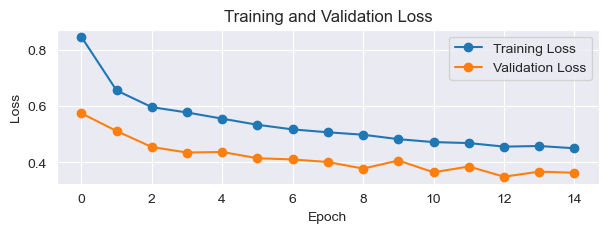

In [8]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have access to the training history
# The training history is typically returned by the `model.fit` method

# Access the training history
# history = model.fit()  # Replace with your actual model.fit() call

# Plot training and validation loss
plt.figure(figsize=(7, 2))
plt.plot(history.history['loss'], label='Training Loss',marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss',marker='o')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Validation Accuarcy

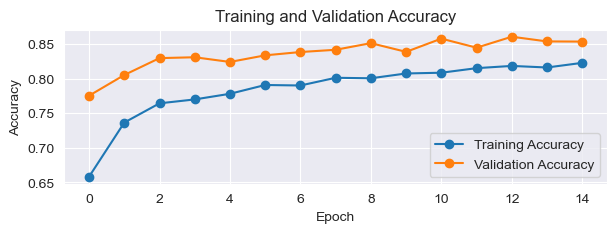

In [9]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and have access to the training history
# The training history is typically returned by the `model.fit` method

# Access the training history
#history = model.fit()  # Replace with your actual model.fit() call

# Plot training and validation accuracy
plt.figure(figsize=(7, 2))
plt.plot(history.history['accuracy'], label='Training Accuracy', marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', marker='o')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Model Performance Evaluation
        Model evaluation performance involves assessing a machine learning model's effectiveness using metrics like
        accuracy, precision, recall, F1-score, and ROC AUC. This process helps gauge the model's suitability for 
        real-world applications and guides improvements.

In [10]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Assuming you have already trained your VGG model and you have the test data in a directory
test_data_dir = 'C:/Users/USER/Desktop/Artificial_Intelligence/Image_Processing/Preprocessed_Eye_Dataset/testing_data'
batch_size = 32  # Adjust the batch size as needed

# Create a data generator for the test set
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(224, 224),  # Adjust to match your model's input size
    batch_size=batch_size,
    class_mode='categorical',  # Change if using different class modes
    shuffle=False  # Set to False to maintain order for confusion matrix
)

# Make predictions on the test data
predictions = model.predict(test_generator)

# Convert one-hot encoded labels to class labels
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate accuracy
accuracy = accuracy_score(true_classes, predicted_classes)
print(f'Accuracy: {accuracy:.2f}')

# Generate a classification report
class_labels = list(test_generator.class_indices.keys())
report = classification_report(true_classes, predicted_classes, target_names=class_labels)
print("Classification Report:")
print(report)

# Generate a confusion matrix
confusion = confusion_matrix(true_classes, predicted_classes)
print("Confusion Matrix:")
print(confusion)

Found 4035 images belonging to 4 classes.
127/127 [==============================] - 803s 6s/step
Accuracy: 0.86
Classification Report:
                      precision    recall  f1-score   support

            cataract       0.80      0.92      0.85       992
diabetic_retinopathy       0.96      0.97      0.96      1038
            glaucoma       0.86      0.65      0.74       967
              normal       0.83      0.89      0.86      1038

            accuracy                           0.86      4035
           macro avg       0.86      0.86      0.86      4035
        weighted avg       0.86      0.86      0.86      4035

Confusion Matrix:
[[ 915    1   56   20]
 [   8 1004   12   14]
 [ 173   15  627  152]
 [  53   26   32  927]]


## Confusion Matrix

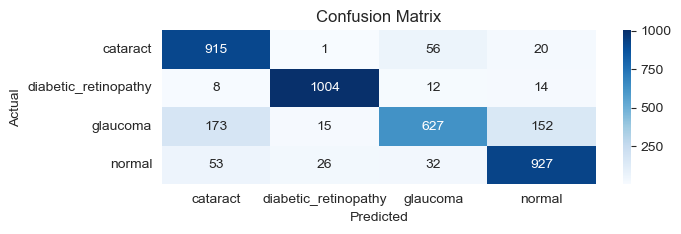

In [11]:
plt.figure(figsize=(7, 2))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix')
plt.show()

## ROC Curve

ROC AUC score: 0.9793722728684933


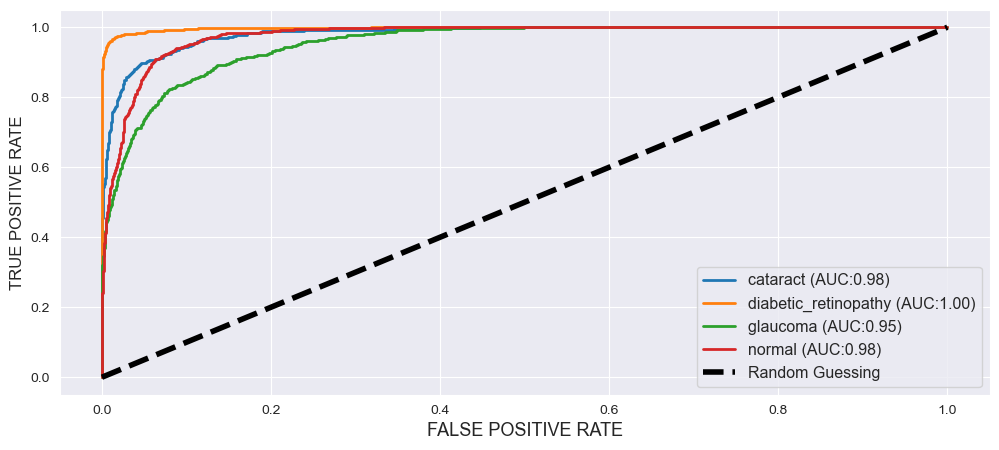

In [12]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import roc_curve, auc, roc_auc_score

# preds = model.predict(test_generator)
preds = predictions
# y_test = test_generator.classes
y_test = true_classes
fig, c_ax = plt.subplots(1,1, figsize = (12,5))
class_names = ['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']
def multiclass_roc_auc_score(y_test, y_pred, average="macro"):
    lb = LabelBinarizer()
    lb.fit(y_test)
    y_test = lb.transform(y_test)
    for (idx, c_label) in enumerate(class_names):
        fpr, tpr, thresholds = roc_curve(y_test[:,idx].astype(int), y_pred[:,idx])
        c_ax.plot(fpr, tpr,lw=2, label = '%s (AUC:%0.2f)'  % (c_label, auc(fpr, tpr)))
    c_ax.plot(fpr, fpr, 'black',linestyle='dashed', lw=4, label = 'Random Guessing')
    return roc_auc_score(y_test, y_pred, average=average)

print('ROC AUC score:', multiclass_roc_auc_score(y_test , preds  , average = "micro"))
plt.xlabel('FALSE POSITIVE RATE', fontsize=13)
plt.ylabel('TRUE POSITIVE RATE', fontsize=12)
plt.legend(fontsize = 11.5)
plt.show()